In [2]:
%load_ext autoreload
%autoreload 2

import os
import sys
import numpy as np
sys.path.insert(0, "/home/grendelyang/NFGP")
sys.path.insert(0, "/home/grendelyang/Implicit-Geometry-Processing/Open3D/examples/python")
import open3d as o3d
import open3d_tutorial as o3dt
os.chdir("/home/grendelyang/NFGP")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import trimesh
import matplotlib
import numpy as np
import meshplot as mp
import matplotlib.pyplot as plt

# Visualize the Implicit Field

In [81]:
!ls -d good_logs/*

good_logs/jolteon_nosedown0.50.2_s1e-1_b1e-3_2021-Dec-07-23-36-55
good_logs/jolteon_nosedown_s1e-1_b1e-3_2021-Dec-06-23-47-59


In [82]:
# log_path = "good_logs/jolteon_nosedown_s1e-1_b1e-3_2021-Dec-06-23-47-59"
log_path = "good_logs/jolteon_nosedown0.50.2_s1e-1_b1e-3_2021-Dec-07-23-36-55"

In [83]:
import os.path as osp
from utils import load_imf

net, cfg = load_imf(
    log_path, 
    return_cfg=True)
net, cfg

good_logs/jolteon_nosedown0.50.2_s1e-1_b1e-3_2021-Dec-07-23-36-55/checkpoints/epoch_659_iters_66000.pt
Original Decoder:
Net(
  (blocks): ModuleList(
    (0): Linear(in_features=3, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=512, bias=True)
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): Linear(in_features=512, out_features=512, bias=True)
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): Linear(in_features=512, out_features=512, bias=True)
    (6): Linear(in_features=512, out_features=1, bias=True)
  )
  (act): Sine()
)
Net(
  (blocks): ModuleList(
    (0): InvertibleResBlockLinear(
      (pos_enc): LipBoundedPosEnc()
      (blocks): ModuleList(
        (0): Linear(in_features=33, out_features=256, bias=True)
        (1): Linear(in_features=256, out_features=256, bias=True)
        (2): Linear(in_features=256, out_features=3, bias=True)
      )
      (act): ELU(alpha=1.0)
    )
    (1): InvertibleResBlockLinear

100%|██████████| 1678/1678 [00:06<00:00, 265.13it/s]


221.62137 40.37848


(DeformationWrapper(
   (orig): Net(
     (blocks): ModuleList(
       (0): Linear(in_features=3, out_features=512, bias=True)
       (1): Linear(in_features=512, out_features=512, bias=True)
       (2): Linear(in_features=512, out_features=512, bias=True)
       (3): Linear(in_features=512, out_features=512, bias=True)
       (4): Linear(in_features=512, out_features=512, bias=True)
       (5): Linear(in_features=512, out_features=512, bias=True)
       (6): Linear(in_features=512, out_features=1, bias=True)
     )
     (act): Sine()
   )
   (deform): Net(
     (blocks): ModuleList(
       (0): InvertibleResBlockLinear(
         (pos_enc): LipBoundedPosEnc()
         (blocks): ModuleList(
           (0): Linear(in_features=33, out_features=256, bias=True)
           (1): Linear(in_features=256, out_features=256, bias=True)
           (2): Linear(in_features=256, out_features=3, bias=True)
         )
         (act): ELU(alpha=1.0)
       )
       (1): InvertibleResBlockLinear(
        

# Load dataset

In [84]:
import trimesh
import importlib
data_lib = importlib.import_module(cfg.data.type)
loader = data_lib.get_data_loaders(cfg.data, None)['train_loader']
for data in loader:
    break
    
print(data.keys())
handles = data['handles'].view(-1, 3).detach().cpu().numpy()
targets = data['targets'].view(-1, 3).detach().cpu().numpy()
print(handles.shape, targets.shape)

dict_keys(['idx', 'handles', 'targets'])
(41, 3) (41, 3)


# Get original mesh

In [85]:
from trainers.utils.vis_utils import imf2mesh

res = 512
org_mesh = imf2mesh(lambda x: net.orig(x), res=res, normalize=True, bound=1., batch_size=1000000)

p = mp.plot(org_mesh.vertices.astype(np.float32), org_mesh.faces.astype(np.float32)) 
p.add_points(handles, shading={'point_color': 'red', 'point_size': 0.25})
p.add_points(targets, shading={'point_color': 'blue', 'point_size': 0.25})

100%|██████████| 135/135 [00:47<00:00,  2.85it/s]


444.3359 80.91569


/home/grendelyang/anaconda3/envs/IGP/lib/python3.6/site-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float32" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))
/home/grendelyang/anaconda3/envs/IGP/lib/python3.6/site-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "uint32" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0002531…

2

# Get the output Mesh

In [86]:
from trainers.utils.vis_utils import imf2mesh

res = 512
out_mesh = imf2mesh(lambda x: net(x, None), res=res, normalize=True, bound=1.0, batch_size=1000000)

p = mp.plot(out_mesh.vertices.astype(np.float32), out_mesh.faces.astype(np.float32)) 
p.add_points(handles, shading={'point_color': 'red', 'point_size': 0.25})
p.add_points(targets, shading={'point_color': 'blue', 'point_size': 0.25})

100%|██████████| 135/135 [01:17<00:00,  1.75it/s]


410.81277 63.546314


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0036385…

2

# Output information for drawing

In [87]:
import os.path as osp

res_path = osp.join(log_path, "results")
os.makedirs(res_path, exist_ok=True)
print(res_path)

inp_mesh_path = osp.join(res_path, "inp.obj")
print(inp_mesh_path)

out_mesh_path = osp.join(res_path, "ours.obj")
print(out_mesh_path)

handles_path = osp.join(res_path, "handles.npy")
print(handles_path)

targets_path = osp.join(res_path, "targets.npy")
print(targets_path)

viewpoint_json_path = osp.join(res_path, "viewpoint.json")
print(viewpoint_json_path)

good_logs/jolteon_nosedown0.50.2_s1e-1_b1e-3_2021-Dec-07-23-36-55/results
good_logs/jolteon_nosedown0.50.2_s1e-1_b1e-3_2021-Dec-07-23-36-55/results/inp.obj
good_logs/jolteon_nosedown0.50.2_s1e-1_b1e-3_2021-Dec-07-23-36-55/results/ours.obj
good_logs/jolteon_nosedown0.50.2_s1e-1_b1e-3_2021-Dec-07-23-36-55/results/handles.npy
good_logs/jolteon_nosedown0.50.2_s1e-1_b1e-3_2021-Dec-07-23-36-55/results/targets.npy
good_logs/jolteon_nosedown0.50.2_s1e-1_b1e-3_2021-Dec-07-23-36-55/results/viewpoint.json


In [88]:
inp_mesh_path = os.path.join(res_path, "inp.obj")
org_mesh.export(inp_mesh_path)
print(inp_mesh_path)

out_mesh_path = os.path.join(res_path, "ours.obj")
out_mesh.export(out_mesh_path)
print(out_mesh_path)

handles_path = os.path.join(res_path, "handles.npy")
np.save(handles_path, handles)
print(handles_path)

targets_path = os.path.join(res_path, "targets.npy")
np.save(targets_path, targets)
print(targets_path)

good_logs/jolteon_nosedown0.50.2_s1e-1_b1e-3_2021-Dec-07-23-36-55/results/inp.obj
good_logs/jolteon_nosedown0.50.2_s1e-1_b1e-3_2021-Dec-07-23-36-55/results/ours.obj
good_logs/jolteon_nosedown0.50.2_s1e-1_b1e-3_2021-Dec-07-23-36-55/results/handles.npy
good_logs/jolteon_nosedown0.50.2_s1e-1_b1e-3_2021-Dec-07-23-36-55/results/targets.npy


In [89]:
# print("Ours")
# print("\tarea:", out_mesh.area/org_mesh.area)
# print("\tmass:", out_mesh.mass/org_mesh.mass)


# Draw:
1. Handles: red
2. Targets: blue
3. Shape: silver

In [90]:
import json

viewpoint_data_str = """
{
	"class_name" : "ViewTrajectory",
	"interval" : 29,
	"is_loop" : false,
	"trajectory" : 
	[
		{
			"boundingbox_max" : [ 0.42560982704162598, 0.55499720573425293, 0.65501725673675537 ],
			"boundingbox_min" : [ -0.42611968517303467, -0.68399083614349365, -0.62972509860992432 ],
			"field_of_view" : 60.0,
			"front" : [ 0.72988269923915927, 0.060240881196447764, -0.68091282965151601 ],
			"lookat" : [ -0.0002549290657043457, -0.064496815204620361, 0.012646079063415527 ],
			"up" : [ -0.049412848153172213, 0.99815299193812412, 0.035340842128657055 ],
			"zoom" : 0.94000000000000017
		}
	],
	"version_major" : 1,
	"version_minor" : 0
}
"""
viewpoint_data = json.loads(viewpoint_data_str)
with open(viewpoint_json_path, 'w') as f:
    json.dump(json.loads(viewpoint_data_str), f)
    
camera_trj = o3d.io.read_pinhole_camera_trajectory(viewpoint_json_path)
camera_trj.parameters

[Open3D WARNING] PinholeCameraTrajectory read JSON failed: unsupported json format.


[]

In [91]:
o3d.__version__

'0.14.1'

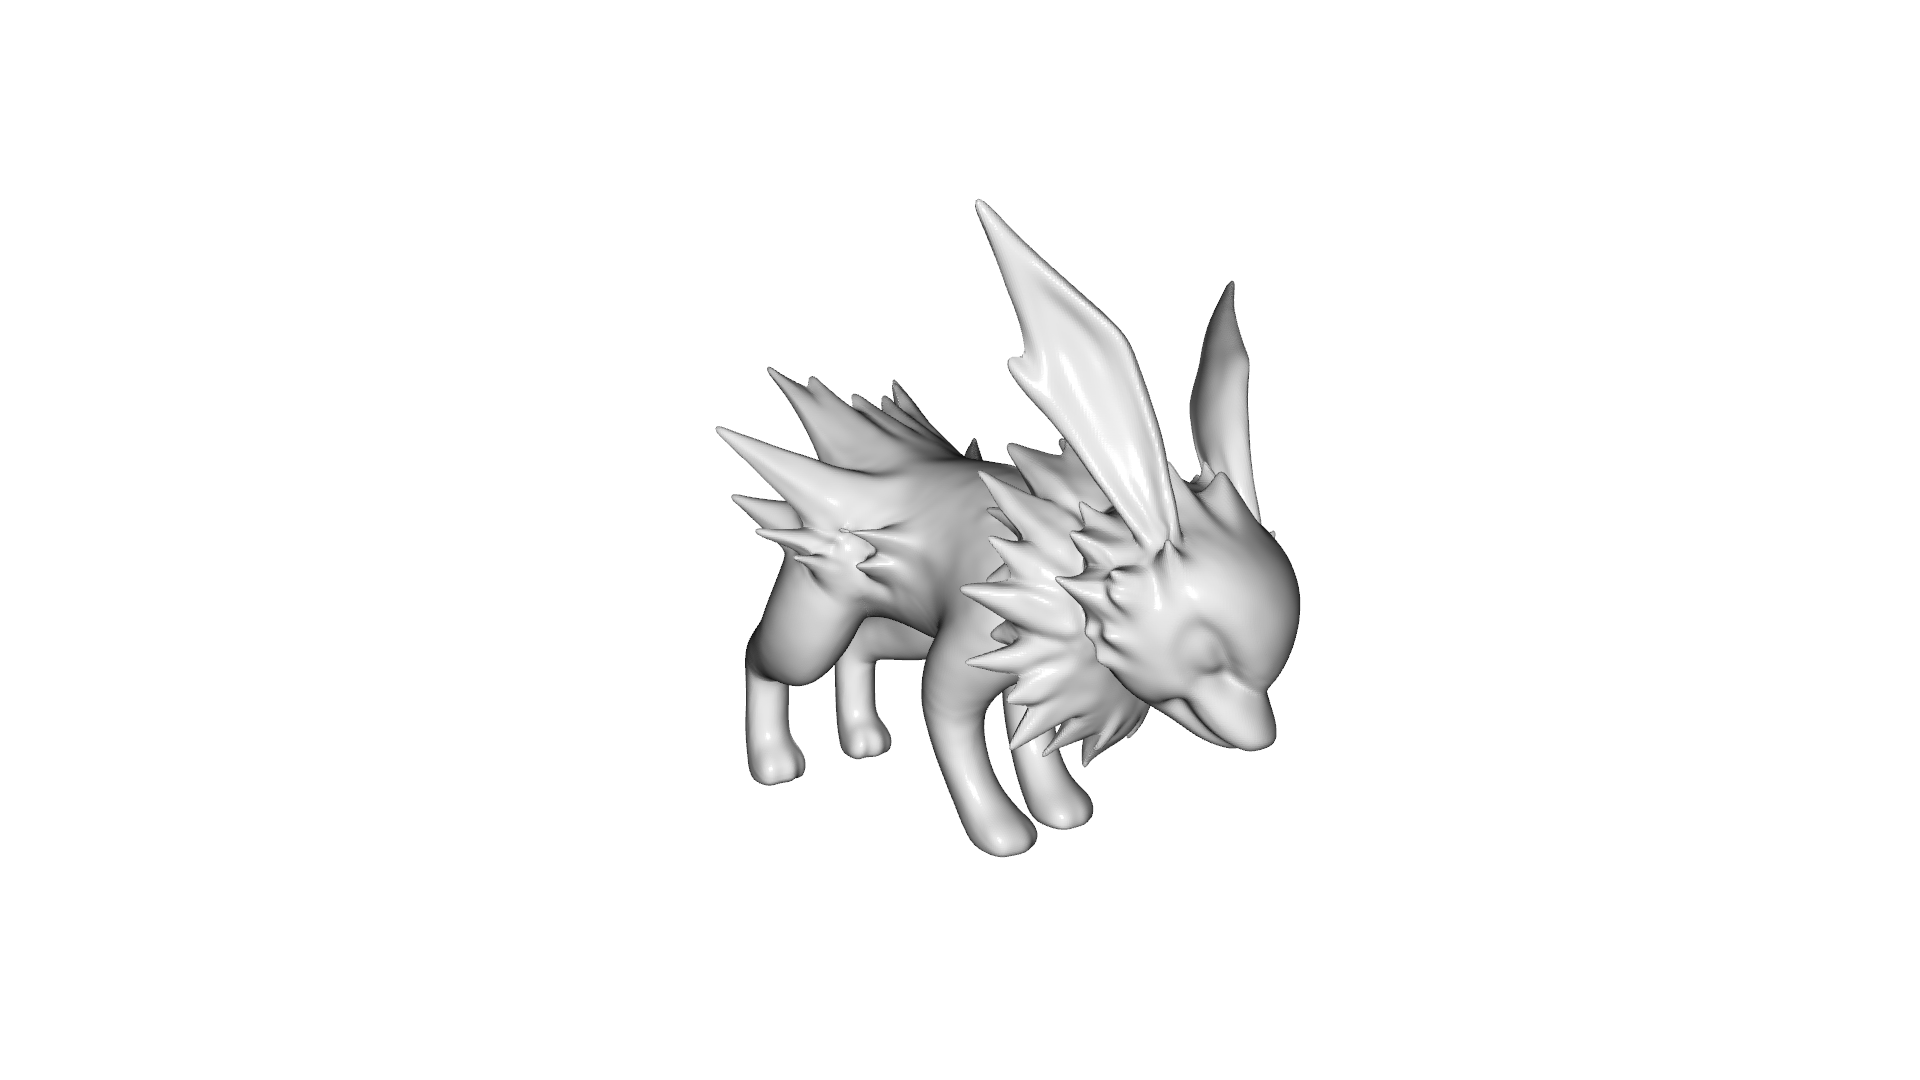

In [92]:
out_mesh_o3d =  o3d.io.read_triangle_mesh(out_mesh_path)
out_mesh_o3d.compute_vertex_normals()

o3d.visualization.draw_geometries(
    [out_mesh_o3d], 
    lookat=[-0.0002549290657043457, -0.064496815204620361, 0.012646079063415527],
    up=[ -0.049412848153172213, 0.99815299193812412, 0.035340842128657055 ],
    zoom=0.94000000000000017
)

# Animate with Rotation

In [93]:
cnt = 0

def custom_draw_geometry_with_rotation(geo_lst, res_path_imgs):
    custom_draw_geometry_with_rotation.index = -1
    custom_draw_geometry_with_rotation.rotation_step = 5.
    os.makedirs(res_path_imgs, exist_ok=True)
    
    def rotate_view(vis):
        glb = custom_draw_geometry_with_rotation
        ctr = vis.get_view_control()
        
#         if glb.index < 0:
#             ctr.set_front(np.array([ 0.72988269923915927, 0.060240881196447764, -0.68091282965151601 ]))
#             ctr.set_lookat(np.array([-0.0002549290657043457, -0.064496815204620361, 0.012646079063415527]))
#             ctr.set_up(np.array([ -0.049412848153172213, 0.99815299193812412, 0.035340842128657055 ]))
#             ctr.set_zoom(0.94000000000000017)
        
        ctr.rotate(glb.rotation_step, 0.0)
        
        curr_fov = ctr.get_field_of_view()
        targ_fov = 5
        if curr_fov != targ_fov:
            if curr_fov > targ_fov:
                delta = - (curr_fov - targ_fov)
            else:
                delta = targ_fov - curr_fov
            assert curr_fov + delta == targ_fov
            ctr.change_field_of_view(step=delta)
            print("bf", curr_fov, "delta", delta, "af", ctr.get_field_of_view())
            

        if glb.index >= 0 and glb.index < int(837):
            print("Capture image {:05d}".format(glb.index))
            # depth = vis.capture_depth_float_buffer(False)
            image = vis.capture_screen_float_buffer(False)
            plt.imsave(osp.join(res_path_imgs, "{:05d}.png".format(glb.index)),
                       np.asarray(image), dpi = 1)
            # vis.capture_depth_image("depth/{:05d}.png".format(glb.index), False)
            # vis.capture_screen_image("image/{:05d}.png".format(glb.index), False)


#         if glb.index < len(glb.trajectory.parameters):
#             ctr.convert_from_pinhole_camera_parameters(
#                 glb.trajectory.parameters[glb.index], allow_arbitrary=True)
#         else:
#             custom_draw_geometry_with_camera_trajectory.vis.\
#                     register_animation_callback(None)
        glb.index = glb.index + 1

        return False

    o3d.visualization.draw_geometries_with_animation_callback(
        geo_lst, rotate_view, height=1024, width=1024)

out_mesh_o3d =  o3d.io.read_triangle_mesh(out_mesh_path)
out_mesh_o3d.compute_vertex_normals()

o3d_handles = o3d.geometry.PointCloud()
o3d_handles.points = o3d.utility.Vector3dVector(np.load(handles_path))
o3d_handles.paint_uniform_color([1, 0., 0])

o3d_targets = o3d.geometry.PointCloud()
o3d_targets.points = o3d.utility.Vector3dVector(np.load(targets_path))
o3d_targets.paint_uniform_color([0., 0., 1])

custom_draw_geometry_with_rotation(
    [out_mesh_o3d, o3d_handles, o3d_targets],
    osp.join(res_path, "out_mesh_rotation")
)

bf 60.0 delta -55.0 af 5.0
Capture image 00000
Capture image 00001
Capture image 00002
Capture image 00003
Capture image 00004
Capture image 00005
Capture image 00006
Capture image 00007
Capture image 00008
Capture image 00009
Capture image 00010
Capture image 00011
Capture image 00012
Capture image 00013
Capture image 00014
Capture image 00015
Capture image 00016
Capture image 00017
Capture image 00018
Capture image 00019
Capture image 00020
Capture image 00021
Capture image 00022
Capture image 00023
Capture image 00024
Capture image 00025
Capture image 00026
Capture image 00027
Capture image 00028
Capture image 00029
Capture image 00030
Capture image 00031
Capture image 00032
Capture image 00033
Capture image 00034
Capture image 00035
Capture image 00036
Capture image 00037
Capture image 00038
Capture image 00039
Capture image 00040
Capture image 00041
Capture image 00042
Capture image 00043
Capture image 00044
Capture image 00045
Capture image 00046
Capture image 00047
Capture image

Capture image 00410
Capture image 00411
Capture image 00412
Capture image 00413
Capture image 00414
Capture image 00415
Capture image 00416
Capture image 00417
Capture image 00418
Capture image 00419
Capture image 00420
Capture image 00421
Capture image 00422
Capture image 00423
Capture image 00424
Capture image 00425
Capture image 00426
Capture image 00427
Capture image 00428
Capture image 00429
Capture image 00430
Capture image 00431
Capture image 00432
Capture image 00433
Capture image 00434
Capture image 00435
Capture image 00436
Capture image 00437
Capture image 00438
Capture image 00439
Capture image 00440
Capture image 00441
Capture image 00442
Capture image 00443
Capture image 00444
Capture image 00445
Capture image 00446
Capture image 00447
Capture image 00448
Capture image 00449
Capture image 00450
Capture image 00451
Capture image 00452
Capture image 00453
Capture image 00454
Capture image 00455
Capture image 00456
Capture image 00457
Capture image 00458
Capture image 00459


Capture image 00822
Capture image 00823
Capture image 00824
Capture image 00825
Capture image 00826
Capture image 00827
Capture image 00828
Capture image 00829
Capture image 00830
Capture image 00831
Capture image 00832
Capture image 00833
Capture image 00834
Capture image 00835
Capture image 00836


# Animation with Optimzation Procedure

In [94]:
cnt = 0

def custom_draw_geometry_with_optimization(mesh_list, handles, targets, res_path_imgs):
    custom_draw_geometry_with_optimization.index = -1
    custom_draw_geometry_with_optimization.mesh_list = mesh_list
    custom_draw_geometry_with_optimization.rotation_step = 20
    os.makedirs(res_path_imgs, exist_ok=True)
    
    out_mesh_o3d = o3d.io.read_triangle_mesh(mesh_list[0])
    out_mesh_o3d.compute_vertex_normals()
    custom_draw_geometry_with_optimization.curr_mesh = out_mesh_o3d
    
    def rotate_view(vis):
        glb = custom_draw_geometry_with_optimization
        ctr = vis.get_view_control()
        
        if glb.index < 0:
            ctr.set_front(np.array([ 0.72988269923915927, 0.060240881196447764, -0.68091282965151601 ]))
            ctr.set_lookat(np.array([-0.0002549290657043457, -0.064496815204620361, 0.012646079063415527]))
            ctr.set_up(np.array([ -0.049412848153172213, 0.99815299193812412, 0.035340842128657055 ]))
            ctr.set_zoom(0.94000000000000017)
        
        # ctr.rotate(glb.rotation_step, 0.0)
        
        curr_fov = ctr.get_field_of_view()
        targ_fov = 5
        if curr_fov != targ_fov:
            if curr_fov > targ_fov:
                delta = - (curr_fov - targ_fov)
            else:
                delta = targ_fov - curr_fov
            assert curr_fov + delta == targ_fov
            ctr.change_field_of_view(step=delta)
            print("bf", curr_fov, "delta", delta, "af", ctr.get_field_of_view())
            

        if glb.index >= 0 and glb.index < len(glb.mesh_list):
            
#             # depth = vis.capture_depth_float_buffer(False)
#             print("Capture image {:05d}".format(glb.index))
#             image = vis.capture_screen_float_buffer(False)
#             plt.imsave(osp.join(res_path_imgs, "{:05d}.png".format(glb.index)),
#                        np.asarray(image), dpi = 1)
            
            print("\tUpdate geometry")
            new_mesh = o3d.io.read_triangle_mesh(mesh_list[glb.index])
            new_mesh.compute_vertex_normals()
            vis.remove_geometry(glb.curr_mesh, reset_bounding_box=False)
            vis.add_geometry(new_mesh, reset_bounding_box=False)
            glb.curr_mesh = new_mesh
            
            # Update geometry
        glb.index = glb.index + 1

        return False

    o3d.visualization.draw_geometries_with_animation_callback(
        [out_mesh_o3d, handles, targets], rotate_view, height=1024, width=1024)

    
mesh_lst = {}
for f in os.listdir(osp.join(log_path, "val")):
    if not f.endswith(".obj"):
        continue
    ep = int(f[len("mesh_"):-len("iters.obj")])
    mesh_lst[ep] = f

mesh_lst = [osp.join(log_path, "val", mesh_lst[i]) for i in range(len(mesh_lst))]
print(len(mesh_lst), mesh_lst[:10])

o3d_handles = o3d.geometry.PointCloud()
o3d_handles.points = o3d.utility.Vector3dVector(np.load(handles_path))
o3d_handles.paint_uniform_color([1, 0., 0])

o3d_targets = o3d.geometry.PointCloud()
o3d_targets.points = o3d.utility.Vector3dVector(np.load(targets_path))
o3d_targets.paint_uniform_color([0., 0., 1])

custom_draw_geometry_with_optimization(
    mesh_lst, o3d_handles, o3d_targets,
    osp.join(res_path, "out_mesh_optimization")
)

667 ['good_logs/jolteon_nosedown0.50.2_s1e-1_b1e-3_2021-Dec-07-23-36-55/val/mesh_0iters.obj', 'good_logs/jolteon_nosedown0.50.2_s1e-1_b1e-3_2021-Dec-07-23-36-55/val/mesh_1iters.obj', 'good_logs/jolteon_nosedown0.50.2_s1e-1_b1e-3_2021-Dec-07-23-36-55/val/mesh_2iters.obj', 'good_logs/jolteon_nosedown0.50.2_s1e-1_b1e-3_2021-Dec-07-23-36-55/val/mesh_3iters.obj', 'good_logs/jolteon_nosedown0.50.2_s1e-1_b1e-3_2021-Dec-07-23-36-55/val/mesh_4iters.obj', 'good_logs/jolteon_nosedown0.50.2_s1e-1_b1e-3_2021-Dec-07-23-36-55/val/mesh_5iters.obj', 'good_logs/jolteon_nosedown0.50.2_s1e-1_b1e-3_2021-Dec-07-23-36-55/val/mesh_6iters.obj', 'good_logs/jolteon_nosedown0.50.2_s1e-1_b1e-3_2021-Dec-07-23-36-55/val/mesh_7iters.obj', 'good_logs/jolteon_nosedown0.50.2_s1e-1_b1e-3_2021-Dec-07-23-36-55/val/mesh_8iters.obj', 'good_logs/jolteon_nosedown0.50.2_s1e-1_b1e-3_2021-Dec-07-23-36-55/val/mesh_9iters.obj']
bf 60.0 delta -55.0 af 5.0
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update ge

	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geometry
	Update geomet

['good_logs/jolteon_nosedown_s1e-1_b1e-3_2021-Dec-06-23-47-59/val/mesh_0iters.obj',
 'good_logs/jolteon_nosedown_s1e-1_b1e-3_2021-Dec-06-23-47-59/val/mesh_1iters.obj',
 'good_logs/jolteon_nosedown_s1e-1_b1e-3_2021-Dec-06-23-47-59/val/mesh_2iters.obj',
 'good_logs/jolteon_nosedown_s1e-1_b1e-3_2021-Dec-06-23-47-59/val/mesh_3iters.obj',
 'good_logs/jolteon_nosedown_s1e-1_b1e-3_2021-Dec-06-23-47-59/val/mesh_4iters.obj',
 'good_logs/jolteon_nosedown_s1e-1_b1e-3_2021-Dec-06-23-47-59/val/mesh_5iters.obj',
 'good_logs/jolteon_nosedown_s1e-1_b1e-3_2021-Dec-06-23-47-59/val/mesh_6iters.obj',
 'good_logs/jolteon_nosedown_s1e-1_b1e-3_2021-Dec-06-23-47-59/val/mesh_7iters.obj',
 'good_logs/jolteon_nosedown_s1e-1_b1e-3_2021-Dec-06-23-47-59/val/mesh_8iters.obj',
 'good_logs/jolteon_nosedown_s1e-1_b1e-3_2021-Dec-06-23-47-59/val/mesh_9iters.obj',
 'good_logs/jolteon_nosedown_s1e-1_b1e-3_2021-Dec-06-23-47-59/val/mesh_10iters.obj',
 'good_logs/jolteon_nosedown_s1e-1_b1e-3_2021-Dec-06-23-47-59/val/mesh_11it

In [69]:
!ls good_logs/jolteon_nosedown_s1e-1_b1e-3_2021-Dec-06-23-47-59/val

mesh_0iters.obj    mesh_268iters.obj  mesh_435iters.obj  mesh_602iters.obj
mesh_100iters.obj  mesh_269iters.obj  mesh_436iters.obj  mesh_603iters.obj
mesh_101iters.obj  mesh_26iters.obj   mesh_437iters.obj  mesh_604iters.obj
mesh_102iters.obj  mesh_270iters.obj  mesh_438iters.obj  mesh_605iters.obj
mesh_103iters.obj  mesh_271iters.obj  mesh_439iters.obj  mesh_606iters.obj
mesh_104iters.obj  mesh_272iters.obj  mesh_43iters.obj	 mesh_607iters.obj
mesh_105iters.obj  mesh_273iters.obj  mesh_440iters.obj  mesh_608iters.obj
mesh_106iters.obj  mesh_274iters.obj  mesh_441iters.obj  mesh_609iters.obj
mesh_107iters.obj  mesh_275iters.obj  mesh_442iters.obj  mesh_60iters.obj
mesh_108iters.obj  mesh_276iters.obj  mesh_443iters.obj  mesh_610iters.obj
mesh_109iters.obj  mesh_277iters.obj  mesh_444iters.obj  mesh_611iters.obj
mesh_10iters.obj   mesh_278iters.obj  mesh_445iters.obj  mesh_612iters.obj
mesh_110iters.obj  mesh_279iters.obj  mesh_446iters.obj  mesh_613iters.obj
mesh_111iters.obj  mesh_27i